In [ ]:
from IPython.core.display import HTML
HTML("<script>Jupyter.notebook.kernel.restart()</script>")

In [1]:
import functions
human = functions.Human()

In [2]:
human.age, human.gender, human.basal_metabolic_rate()

(35, 'male', 1675.8)

In [3]:
help(functions.Human())

Help on Human in module functions object:

class Human(builtins.object)
 |  Human(age: int = 35, gender: str = 'male', height: float = 1.75, weight: float = 75, position: str = 'standing', orientation: float = 0, clothingInsulation: float = None, clothingAlbedo: float = 0.37, acclimation: bool = False, metabolicRate: float = 2.32)
 |  
 |  Defines a single human, with physiological attributes against which comfort will be evaluated
 |  
 |  Methods defined here:
 |  
 |  __init__(self, age: int = 35, gender: str = 'male', height: float = 1.75, weight: float = 75, position: str = 'standing', orientation: float = 0, clothingInsulation: float = None, clothingAlbedo: float = 0.37, acclimation: bool = False, metabolicRate: float = 2.32)
 |      :param age: Age of the human
 |      :param gender: Gender of the human - either "male" or "female"
 |      :param height: Height of the human (m)
 |      :param weight: Weight of the human (kg)
 |      :param position: Body position - either "seated

In [4]:
functions.celsius_to_fahrenheit(28)

82.4

In [5]:
functions.celsius_to_kelvin(0)

273.15

In [6]:
functions.fahrenheit_to_celsius(82.4)

28.000000000000004

In [7]:
functions.heat_index(22, 30)

(21.038888888888884, 0, True)

In [8]:
functions.dewpoint_temperature(20, 50)

9.254294282076941

In [9]:
functions.humidity_index(20, 9.2)

(20.917678437748936, 0, True)

In [10]:
functions.discomfort_index(20, 50)

(18.4875, 6, True)

In [11]:
functions.wind_chill_temperature(0, 2.5)

(-3.0399222228067426, 1, False)

In [12]:
functions.wet_bulb_globe_temperature_outdoors(15, 15, 10253, 1)

(12.83225332, 0, True)

In [13]:
functions.effective_temperature(14, 58, 0.1, 0, 0.5)

(13.328, 2, False)

In [25]:
functions.wind_speed_at_height(1, 10, 100, log=True)

1.2128125949042536

(19.0, 23.0)

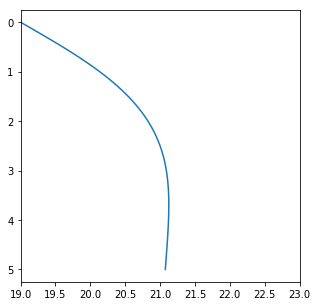

In [28]:
import numpy as np
import matplotlib.pyplot as plt

depths = np.linspace(0, 5, 100)
days_since = np.arange(0, 365, 1)

depth = 5
days_since_cold = 4
soil_diffusivity = 0.02
avg_annual_temp = 21
temp_swing = 4

fig, ax = plt.subplots(1, 1, figsize=(5, 5))
xs = [functions.estimate_ground_temperature_at_depth(depth, avg_annual_temp, temp_swing, days_since_cold, soil_diffusivity) for depth in depths]
ax.plot(xs, depths)
ax.invert_yaxis()
ax.set_xlim([avg_annual_temp-temp_swing/2, avg_annual_temp+temp_swing/2])

In [56]:
import math

# http://www.forschung-geotechnik.org/Forschung/Geothermik/temperaturmodell.htm

soil_diffusivities = {
    "Rock": 0.02,
    "Wet clay": 0.015,
    "Wet sand": 0.01,
    "Dry clay": 0.002,
    "Dry sand": 0.001
}

angular_frequency = 2 * math.pi / 365
soil_thermal_diffusivity = soil_diffusivities["Rock"]
damping_depth = math.sqrt(2 * soil_thermal_diffusivity / angular_frequency)
annual_average_air_temperature = 21
max_avg_temperature_offset = 15
days_since_coldest_day = 4
depth = 5


ground_temperature = annual_average_air_temperature - max_avg_temperature_offset * math.exp(-depth / damping_depth) * math.cos((angular_frequency * days_since_coldest_day) - (depth / damping_depth))

print("{0:}\n{1:}\n{2:}\n{3:}\n{4:}\n{5:}".format(annual_average_air_temperature, max_avg_temperature_offset, soil_thermal_diffusivity, days_since_coldest_day, depth, ground_temperature))


21
15
0.02
4
5
21.56301529313202
